In [2]:
from __future__ import division
import codecs
import re
import copy
import collections

import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib.pyplot as plt

%matplotlib inline

#nltk.download('stopwords')
#nltk.download('all')
from nltk.corpus import stopwords

data = pd.read_csv(r"C:\Users\Aufar\Desktop\edm\reuters-newswire-2017-edited.csv")
data.head(999)

,headline_text,category
0,Southern European bond yields hit multi-week lows,3
1,BRIEF-LG sells its entire stake in unit LG Lif...,6
2,BRIEF-Golden Wheel Tiandi says unit confirms s...,3
3,BRIEF-Sunshine 100 China Holdings Dec contract...,3
4,Euro zone stocks start 2017 with new one-year ...,3
5,China Stocks-Factors to watch on Tuesday,3
6,BRIEF-Hong Kong Education Intl investments ent...,7
7,BRIEF-Platige Image sets conditions to end inv...,3
8,European shares hit highs as PMI data comes as...,3
9,Denmark awaiting extradition order from South ...,4


In [3]:
datas = data["category"]
data = data.drop(columns="category")
data = pd.read_csv(r"C:\Users\Aufar\Desktop\edm\reuters-newswire-2017-edited.csv")
data = data.drop(columns="category")
data.to_csv(r"C:\Users\Aufar\Desktop\edm\headline_text.csv", sep='\t', index=False)

with codecs.open(r"C:\Users\Aufar\Desktop\edm\headline_text.csv", 
                 encoding="utf-8") as f:
    headline_text = f.read()

headline_text
Southern European bond yields hit multi-week lows
BRIEF-LG sells its entire stake in unit LG Life Sciences
BRIEF-Golden Wheel Tiandi says unit confirms subscription of new shares of Xiamen International Bank
BRIEF-Sunshine 100 China Holdings Dec contracted sales of RMB1.76 bln
Euro zone stocks start 2017 with new one-year high. For more see the European equities LiveMarkets blog
China Stocks-Factors to watch on Tuesday
BRIEF-Hong Kong Education Intl investments entered into sale and purchase agreement
BRIEF-Platige Image sets conditions to end investment in Juice
European shares hit highs as PMI data comes as New Year's gift
Denmark awaiting extradition order from South Korea for Chung Yoo-ra
Britain to build 17 towns and villages to ease housing squeeze
Myanmar vows action on police abuse after video of beating emerges
BRIEF-CCC Dec. 2016 revenue up 50 percent YoY
BRIEF-Oriental Bank of Commerce cuts overnight MCLR to 8.40 pct
Oil prices rise as markets eye OPEC
Preview 

In [4]:
datas.to_csv(r"C:\Users\Aufar\Desktop\edm\category.csv", sep='\t', index=False)

with codecs.open(r"C:\Users\Aufar\Desktop\edm\category.csv", 
                 encoding="utf-8") as f:
    category = f.read()

In [4]:
esw = stopwords.words('english')
esw.append("1")

word_pattern = re.compile("^\w+$")

def get_text_counter(text):
    tokens = WordPunctTokenizer().tokenize(PorterStemmer().stem(text))
    tokens = list(map(lambda x: x.lower(), tokens))
    tokens = [token for token in tokens if re.match(word_pattern, token) and token not in esw]
    return collections.Counter(tokens), len (tokens)

def make_df(counter, size):
    abs_freq = np.array([el[1] for el in counter])
    rel_freq = abs_freq / size
    index = [el[0] for el in counter]
    df = pd.DataFrame(data=np.array([abs_freq, rel_freq]).T, index=index, columns=["Absolute frequency","Relative frequency"])
    
    df.index.name = "Most Common words"
    return df

In [5]:
print("Headline text")
je_counter, je_size = get_text_counter(headline_text)
df = make_df(je_counter.most_common(10), je_size)
df.reset_index()

Headline text


,Most Common words,Absolute frequency,Relative frequency
0,brief,487.0,0.056846
1,pct,88.0,0.010272
2,says,83.0,0.009688
3,china,66.0,0.007704
4,new,58.0,0.006770
5,mln,56.0,0.006537
6,unit,55.0,0.006420
7,india,51.0,0.005953
8,stake,47.0,0.005486
9,bank,47.0,0.005486


In [6]:
esw.remove("1")
print("Category")

print("0 : Politics\n1 : Sport\n2 : Life\n3 : Economy\n4 : World News\n5 : Health\n6 : Technology\n7 : Education")

je_counter, je_size = get_text_counter(category)
df_category = make_df(je_counter.most_common(8), je_size)
esw.append("1")
df_category.reset_index()

Category
0 : Politics
1 : Sport
2 : Life
3 : Economy
4 : World News
5 : Health
6 : Technology
7 : Education


,Most Common words,Absolute frequency,Relative frequency
0,3,584.0,0.584585
1,4,188.0,0.188188
2,6,64.0,0.064064
3,5,64.0,0.064064
4,1,61.0,0.061061
5,0,30.0,0.030030
6,2,7.0,0.007007
7,7,1.0,0.001001


Pie Plot Most Common Words : 


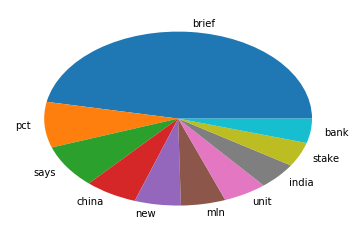

In [7]:
df1 = df.reset_index()
a = np.array(df1['Absolute frequency'])
b = np.array(df1['Most Common words'])

print("Pie Plot Most Common Words : ")
plt.pie(a, labels=b)
plt.show()

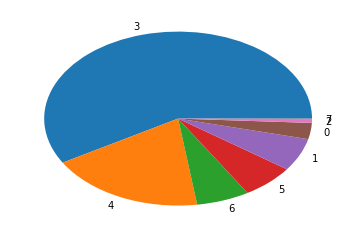

Category : 
0 : Politics
1 : Sport
2 : Life
3 : Economy
4 : World News
5 : Health
6 : Technology
7 : Education


In [8]:
df2 = df_category.reset_index()
c = np.array(df2['Absolute frequency'])
d = np.array(df2['Most Common words'])

plt.pie(c, labels=d)
plt.show()

print("Category : ")
print("0 : Politics\n1 : Sport\n2 : Life\n3 : Economy\n4 : World News\n5 : Health\n6 : Technology\n7 : Education")